<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/9_nlp_with_tensorflow/1_intro_to_nlp_and_text_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Intro to NLP and Text Processing with TensorFlow

## Contents 

* [1. Intro to Natural Language Processing](#1)
* [2. Text Processing with TensorFlow](#2)
   * [2.1 Traditional Text Encoding](#2-1)
   * [2.2 Text Encoding with Tokenizer](#2-2)
   * [2.3 Converting Texts into Sequence of Tokens](#2-3)
   * [2.4 Padding Texts Sequences](#2-4)


* [3. Using TextVectorization](#3)

<a name='1'></a>
## 1. Intro to Natural Language Processing

We are surrounded by intelligent machines that can not only see the world, but also can understand and talk with us. 

That is not exagerating. At regular basis, some of us interact with virtual assistants such as Siri, Amazon Alexa, and Google Assistant. And there are thousands of chatbots that we interact with on many software applications and websites. 

NLP or Natural Language Processing is an interdisciplinary field. It is a branch of computer science, machine learning, and [computational linguistic](https://en.wikipedia.org/wiki/Computational_linguistics) that is concerned with giving the computers the ability to understand texts and human languages. 

### Common tasks involved in NLP

Below are some of the common tasks that can be done with NLP. 

* Text classification
* Sentiment analysis
* Text generation
* Machine translation
* Speech recognition 
* Text to speech conversion
* Optical character recognition

#### Example Applications of NLP

* Spam detection 
* Question answering
* Language to language translation (Machine translation)
* Grammatical error correction (like Grammarly)

One of the classical NLP tool is [NLTK](https://www.nltk.org). Natural Language Toolkit or NLTK provides different functionalities for working with texts and it is commonly used. 

In this lab and later lab, we won't use NLTK. We will use Keras and TensorFlow texts functions. 

There is also a suite of TensorFlow libraries for text processing such as [TensorFlow Text](https://www.tensorflow.org/text/guide/tf_text_intro). 

<a name='2'></a>
## 2. Intro to Text Processing with TensorFlow

<a name='2-1'></a>

### 2.1 Text encodings

Most machine learning models (including deep learning ones) can not handle text data. They have to be converted into numerics. In essence, that's what text encoding means: it's converting the text into numerics representation. 

There are 4 main texts encoding techniques which are: 
* Character encoding
* Words based encoding
* One hot encoding
* Word embeddings

Let's talk about these techniques in details. 

#### Character Based Encoding

In this type of encoding technique, each character in a word is represented by unique number. 

One of the traditional character encoding technique is ASCII(American Standard Code Information Interchange). With ASCII, we can nearly convert any character to numeric, and it's pretty standard, but one of the disadvantages is that the antigrams (words with same letters in different order) can have the same encodings, and that can hurt the machine learrning model. 

Example of antigrams include `United` and `Unitied`, `Silent` and `Listen`. 

Character encoding is not widely used and it's less efficient compared to other later techniques. 

The image below shows character encoding done on antigrams.


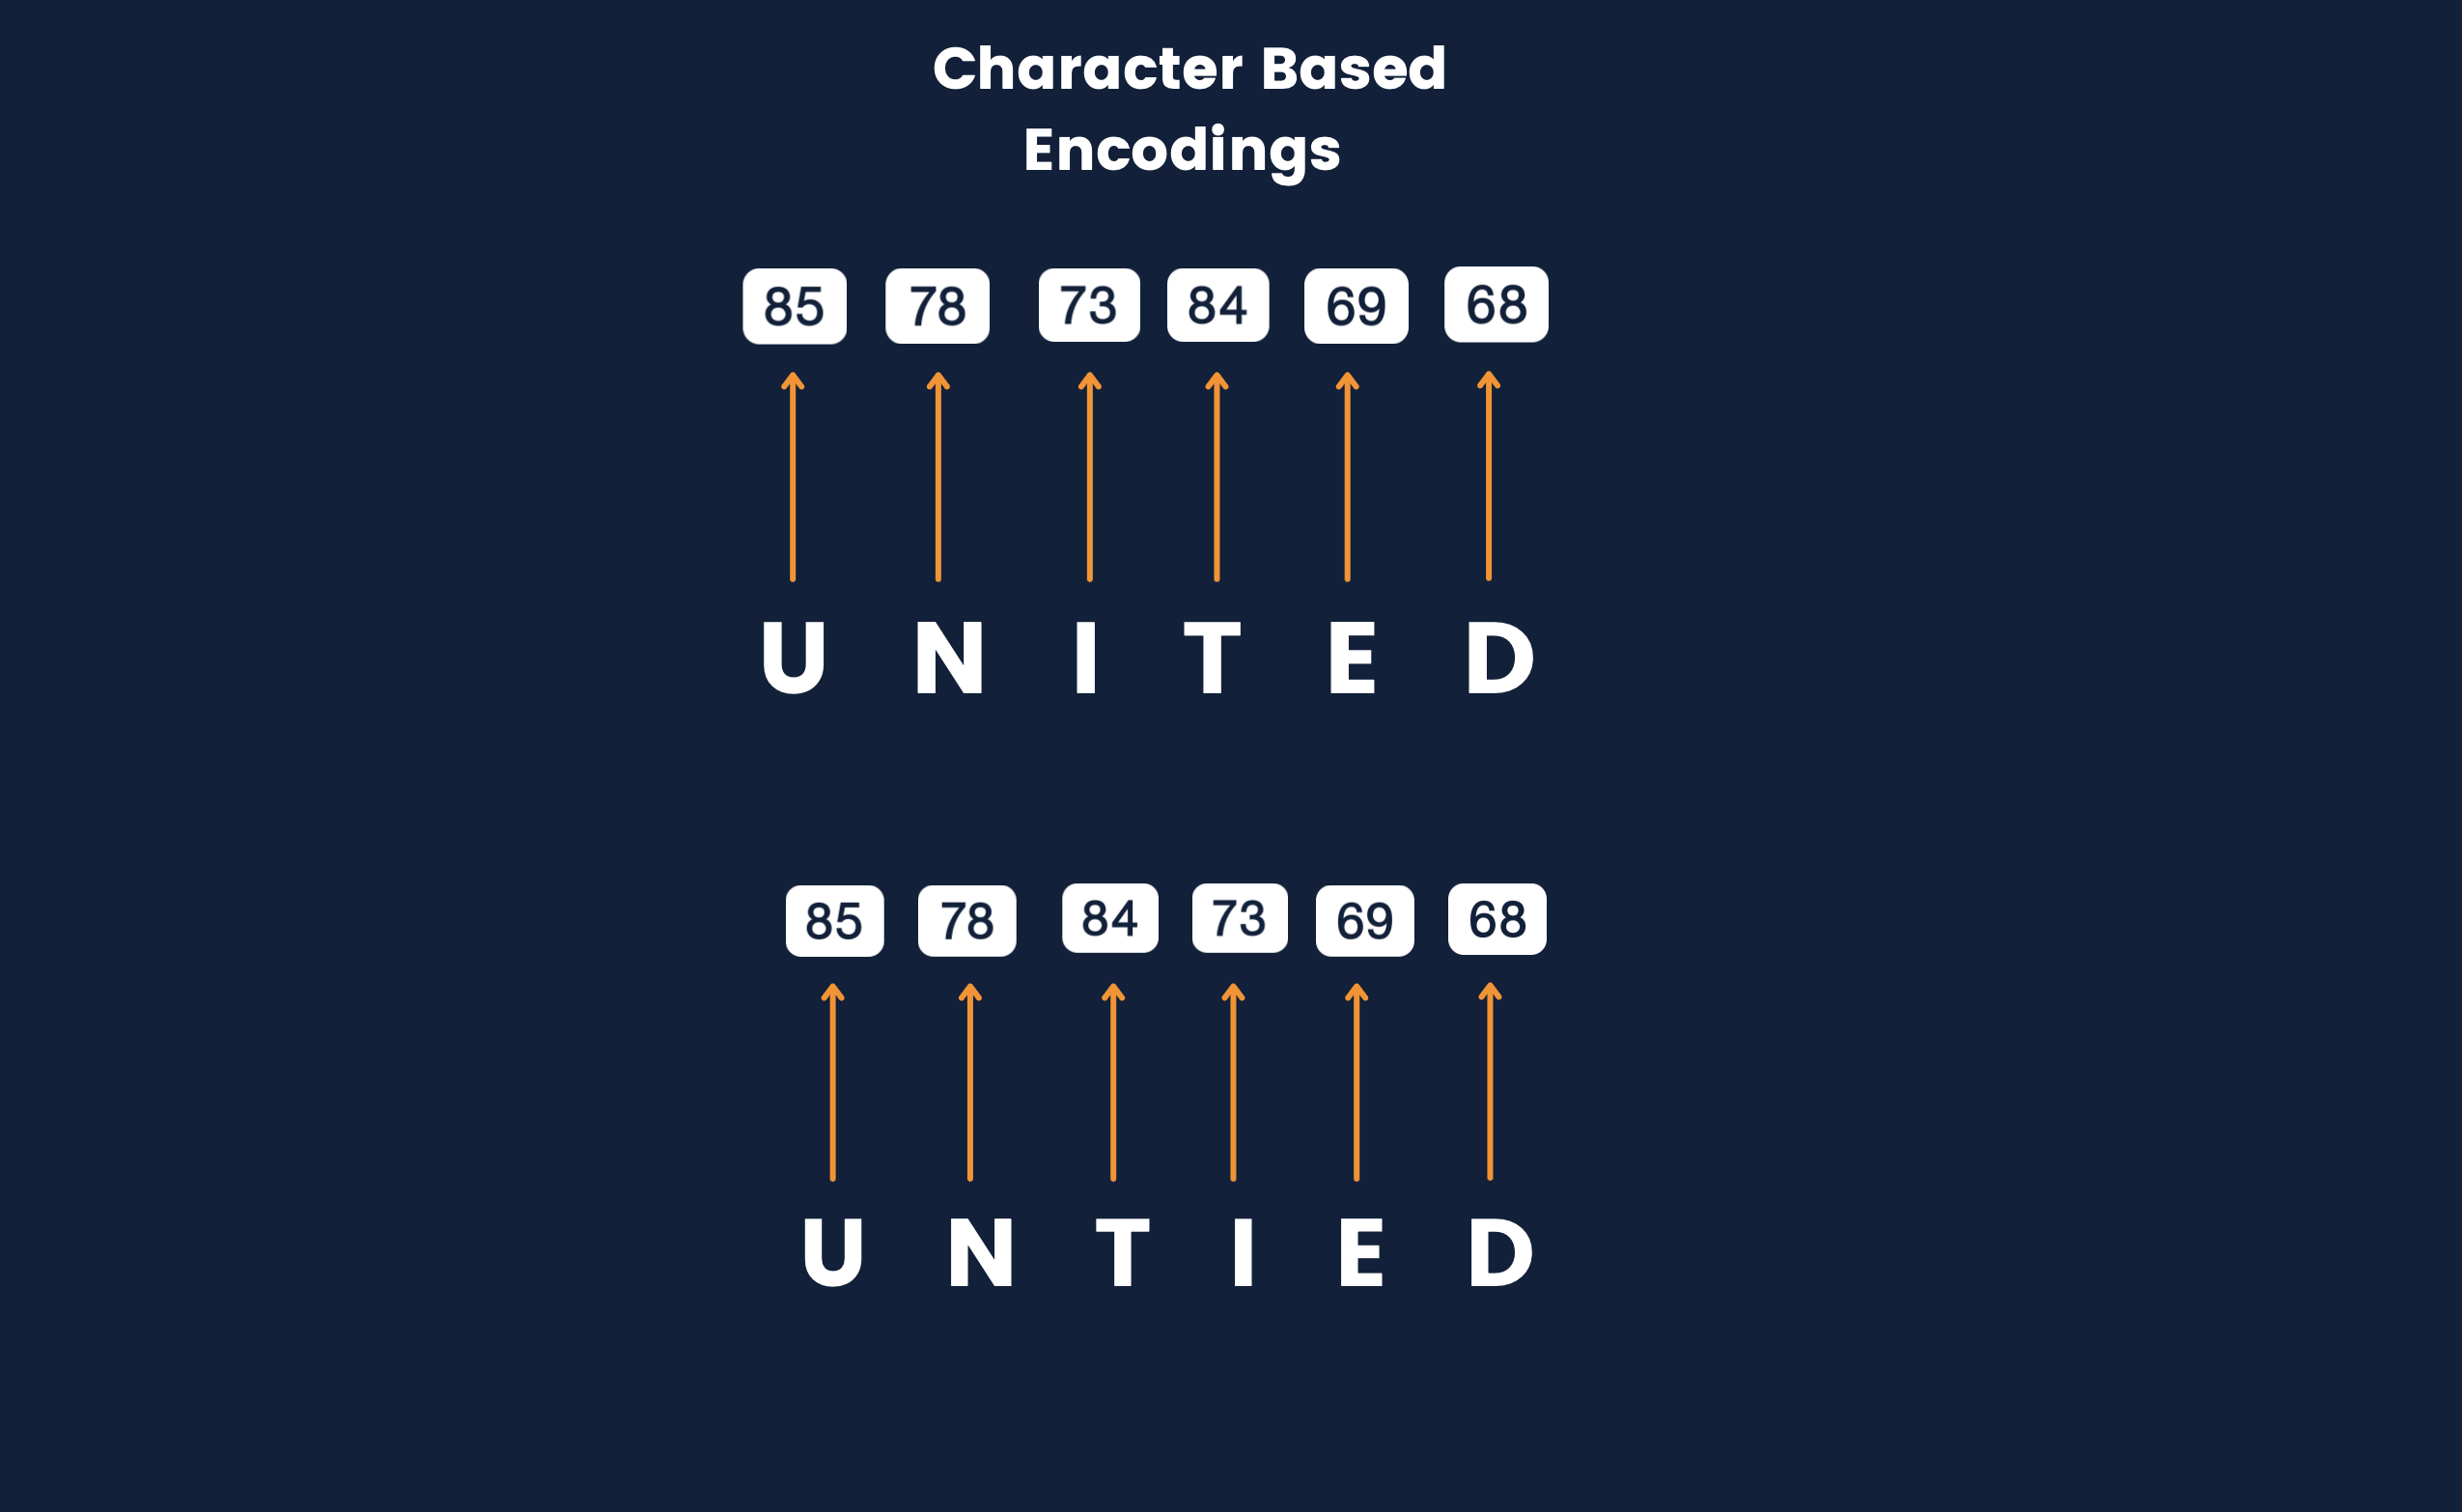

#### Words Based Encoding

In word based encoding, instead of taking a single character in a word, we represent all the individual words with numbers. 

In most cases, words encoding works well than character encodings. 

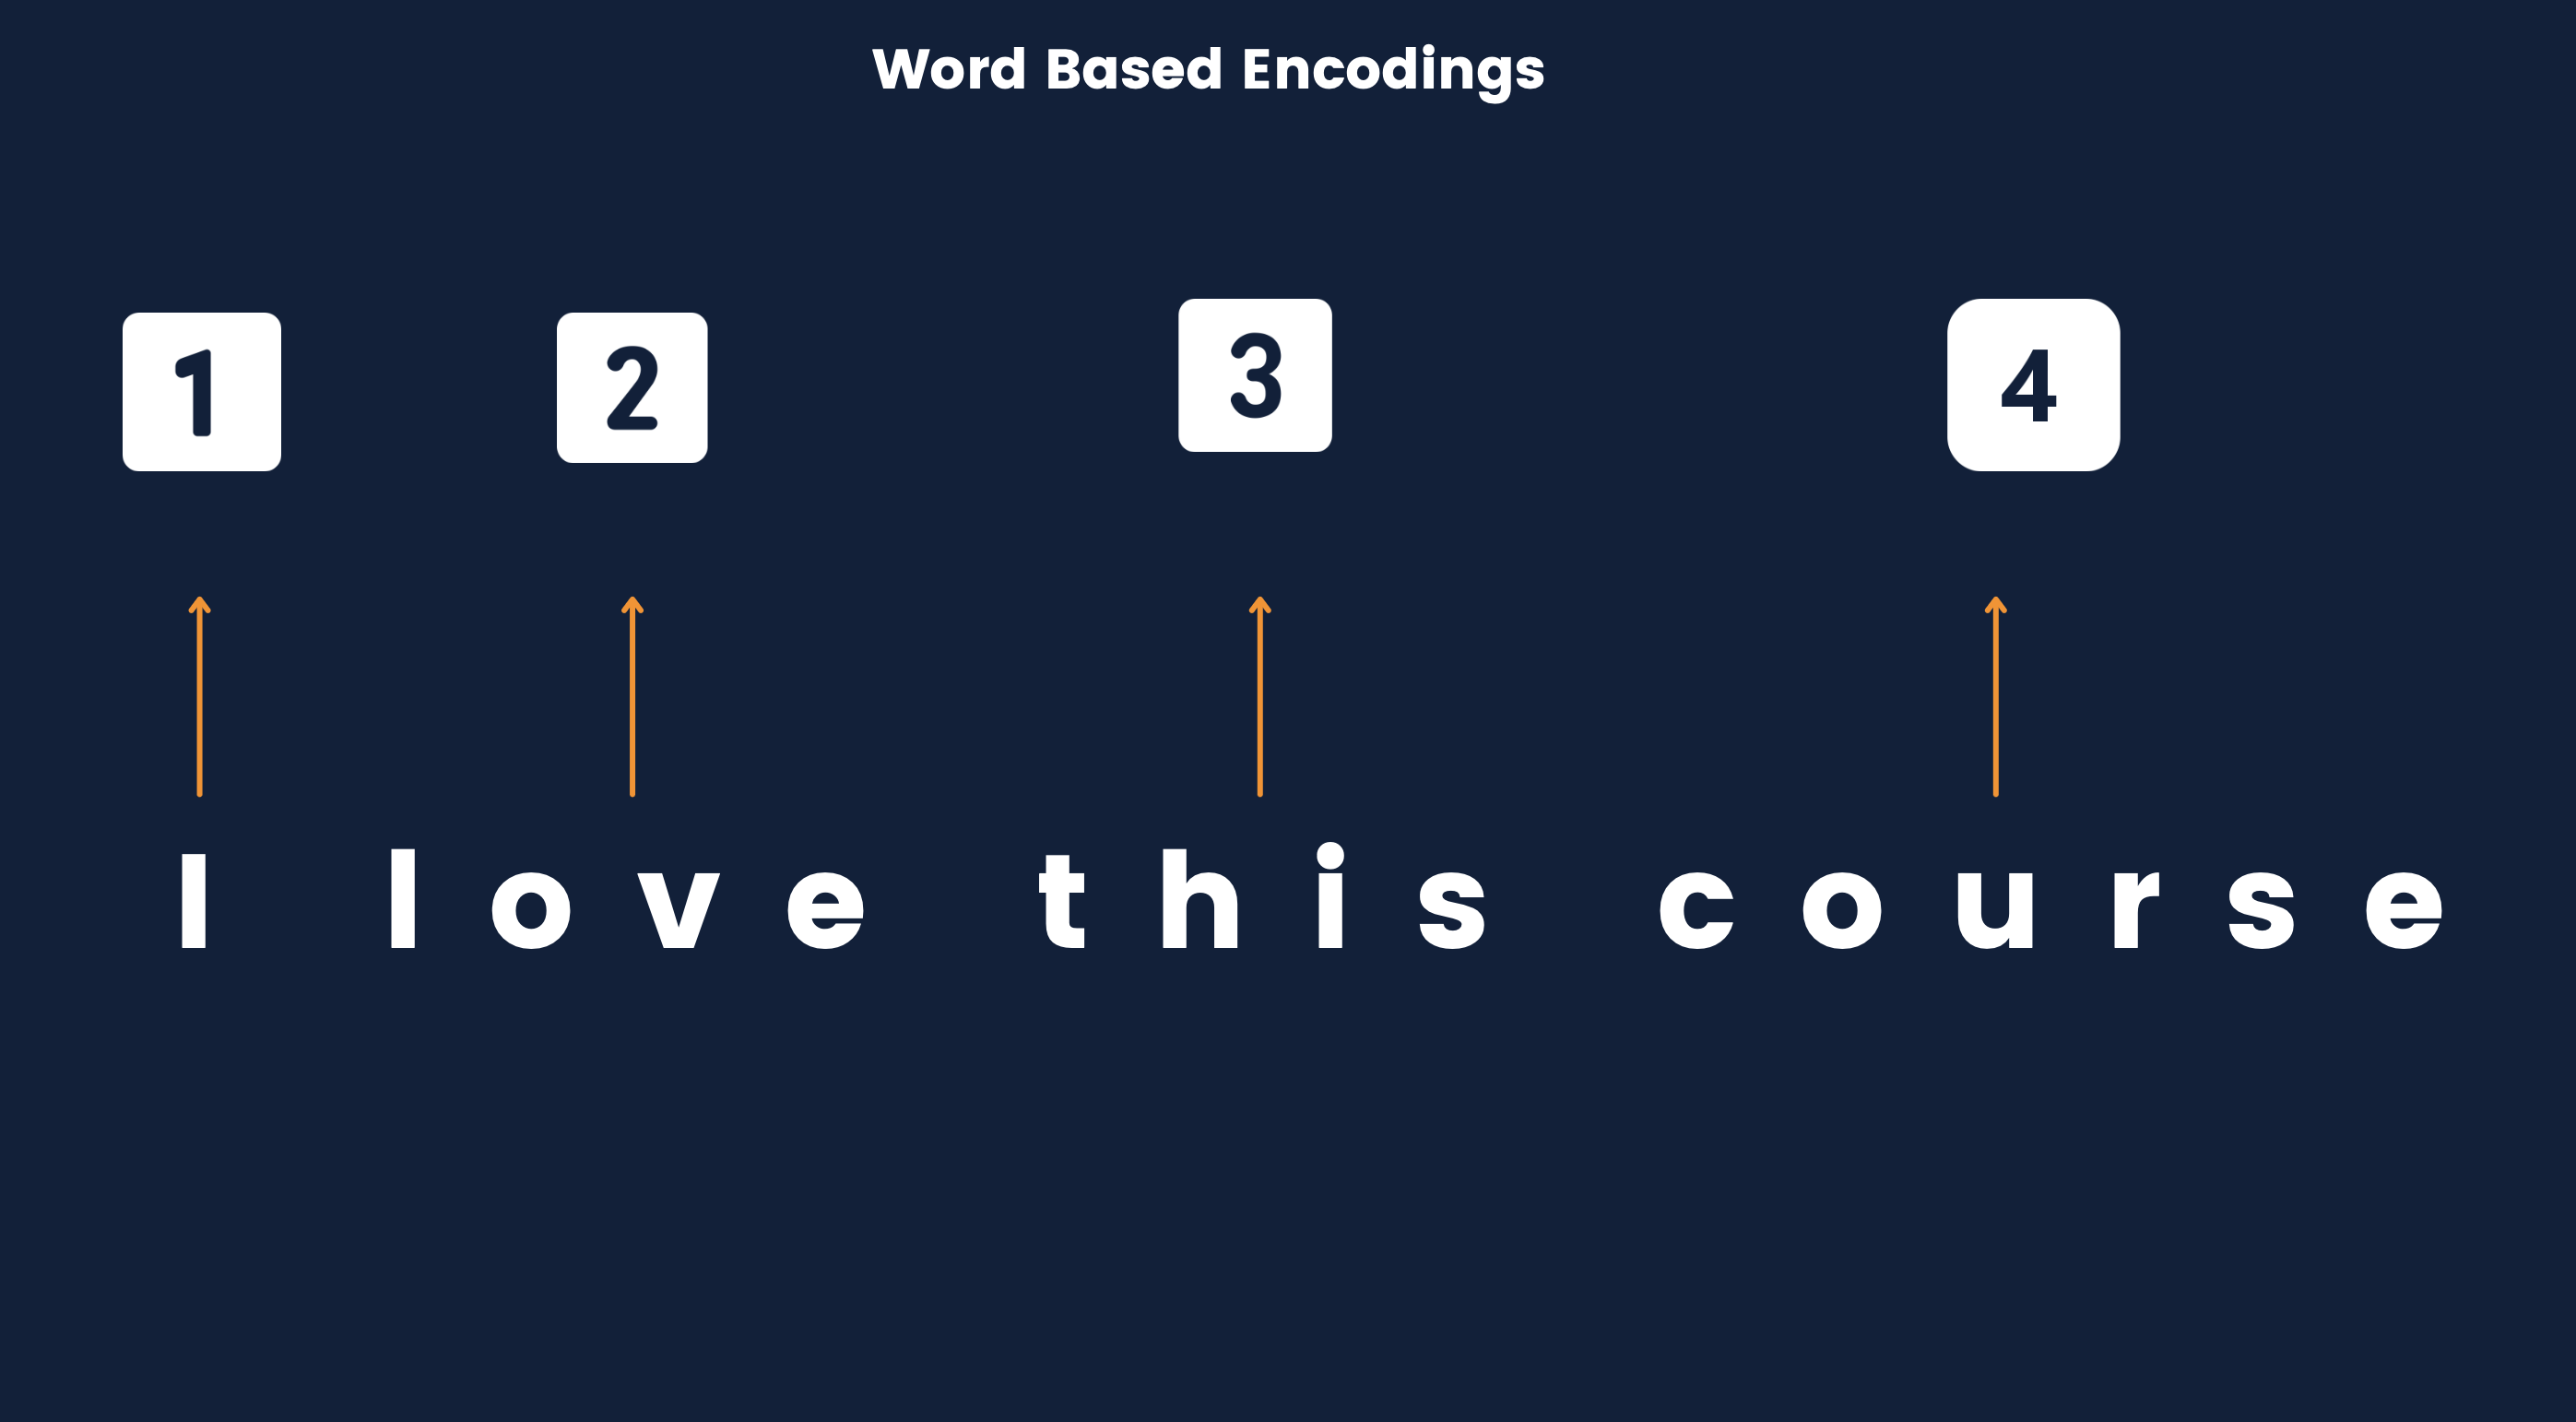

#### One Hot Encoding

One hot encoding is another encoding technique that is most known for [encoding categorical features](https://jeande.medium.com/your-onestop-guide-on-handling-categorical-features-5988caaef78a). Although it's not an effective, it can also be used for texts encoding, and the idea is to convert each words in a sentence into one hot vector, where that word will be `1(hot)` and all other words be `0(cold)` in such particular vector. 

Take for instance the sentence `I love this course`. We can take words in such sentence [I, love, this, course] and then create a zero vector with length of 4, and then have 1 on the index that corresponds to the every word as it is shown below. 

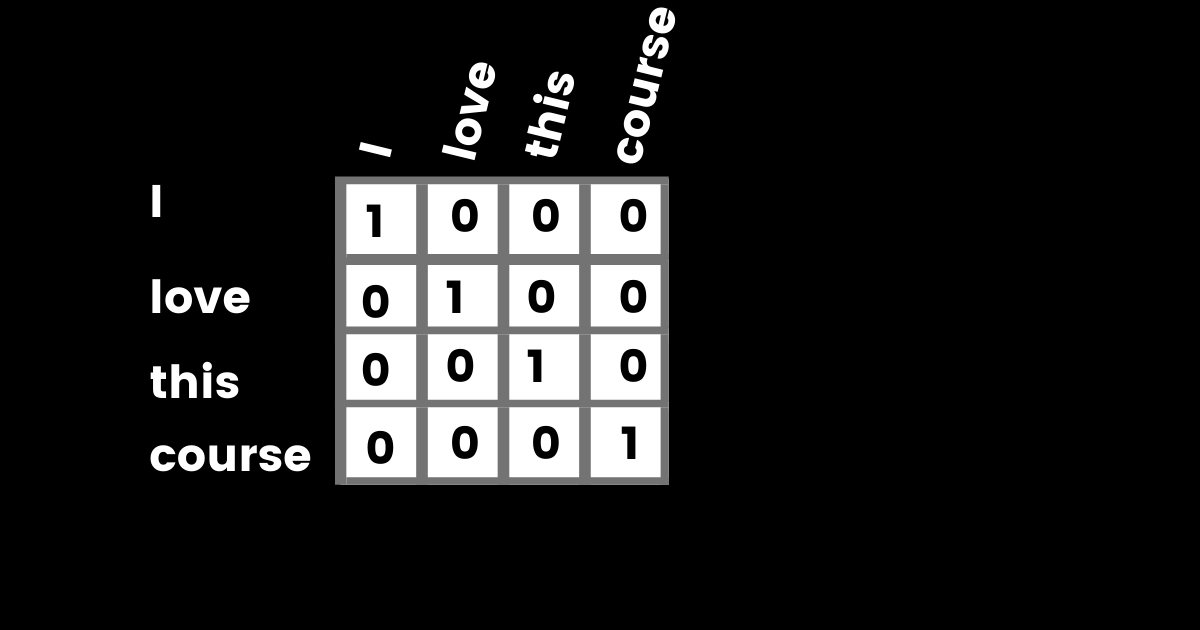

One hot encoding is not a better way to represent texts because most indices are zero and it becomes even harder when you have many words. It will take a lot of space in memory.

By far, in all encoding techniques we saw (character encoding, word encoding, and one hoting words), words encoding is a good way to represent texts. But there is a more better way that is called word embeddings. 

Words embeddings are another way to represent texts where each word is converted into a feature vector, and vectors of the words that have the same semantic meaning will have the same direction in a high dimensional space. We will learn more about embeddings in the next notebook, but if you want you can play with them [here](http://projector.tensorflow.org).

<a name='2-2'></a>

### 2.2 Text Encoding with Keras Tokenizer

Tokenizer is a Keras text preprocessing function that makes it easy to convert a raw text into tokens or sequence of integers.  


We can use [Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) to encode texts at character or words level. 

We will most of the time prefer words encoding than character encoding to avoid the problems that can be caused by antigram words (the words that has the same characters in different order, ex: united & unitied, listen & silent, restful & fluster).

Let's import TensorFlow and Tokenizer and we will start tokenizing texts right away. 

#### Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

Before we start converting texts into tokens, let's see all the possibilities available in `Tokenizer`.

Tokenizer arguments

```
■ num_words: the maximum number of words to keep in input text. It's always better to set a high number of you're not sure. If you set a number less than words that you have in texts, the rest will not tokenized.

■ filters: By default, all punctuations and tabs will be removed. If you want to change that, you can provide the punctuations that you want to keep. 

■ lower: This is to be True or False. By default, it is True and that means all texts will be converted to lower case.

split: separator for splitting words. A default separator is a space(" "). If in your texts words are splitted by something else, be sure to mention that there. 

■ char_level: If True, every character will be treated as token. It is False by default.

■ oov_token: This denotes something that to be added to the word_index to replace words that are not available in input text. 

And the last thing to note is that tokens starts at 1.
```



#### Getting the Text

For simplicity, let's explore the all possibilities of Keras's Tokenizer using a simple sentences. Later, we will practice the skills on real world datasets.

In [ ]:
# A sample sentence

sentences = ['TensorFlow is a Machine Learning framework',
             'Keras is a well designed deep learning API',
             'TensorFlow and Keras make a great machine learning ecosystem'
              
]

In [ ]:
sentences

['TensorFlow is a Machine Learning framework',
 'Keras is a well designed deep learning API',
 'TensorFlow and Keras make a great machine learning ecosystem']

Let's instiate our Tokenizer. We will assume that the number of words are 1000. 

Note that by setting `char_level` to true, we will are converting each character as a token. This is not feasible as we have seen early. It becomes a problems for words that have same characters in different order(antigrams) because their tokens will be ultimately the same. 

In [ ]:
tokenizer = Tokenizer(num_words=1000, char_level=True)

# Fitting tokenizer on sentences
tokenizer.fit_on_texts(sentences)

Let's get the character index, a dictionary that map each character to its token.

In [ ]:
char_index = tokenizer.word_index
print(char_index)

{' ': 1, 'e': 2, 'a': 3, 'n': 4, 'r': 5, 's': 6, 'i': 7, 'l': 8, 'o': 9, 'm': 10, 'g': 11, 't': 12, 'w': 13, 'k': 14, 'd': 15, 'f': 16, 'c': 17, 'h': 18, 'p': 19, 'y': 20}


In real world dataset, you would not want to do that. Let's see what happens when we tokenize words instead of characters. 

It's only just setting `char_level` to `False`.

In [ ]:
tokenizer = Tokenizer(num_words=1000)

# Fitting tokenizer on sentences
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(word_index)

{'a': 1, 'learning': 2, 'tensorflow': 3, 'is': 4, 'machine': 5, 'keras': 6, 'framework': 7, 'well': 8, 'designed': 9, 'deep': 10, 'api': 11, 'and': 12, 'make': 13, 'great': 14, 'ecosystem': 15}


As you can see, rather than having tokens of characters, we have tokens of words and that's more meaningful. By default, punctuations are removed. 

Also, we can get how many times each word appears in a sentence/document.

In [ ]:
word_counts = tokenizer.word_counts
word_counts

OrderedDict([('tensorflow', 2),
             ('is', 2),
             ('a', 3),
             ('machine', 2),
             ('learning', 3),
             ('framework', 1),
             ('keras', 2),
             ('well', 1),
             ('designed', 1),
             ('deep', 1),
             ('api', 1),
             ('and', 1),
             ('make', 1),
             ('great', 1),
             ('ecosystem', 1)])

That's it for Tokenization. 

Tokens are not enough and they are not in any order. It's also best to follow the sequence of input sentences. 

<a name='2-3'></a>

### 2.3 Converting the Texts into Sequence of Tokens


Instead of getting tokens and stops there, we can also take anoother step further: converting sentence into sequence of tokens. 

This is important because it preserve the sequence of the words in sentence. 

In [ ]:
sentences

['TensorFlow is a Machine Learning framework',
 'Keras is a well designed deep learning API',
 'TensorFlow and Keras make a great machine learning ecosystem']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Redefining our sentence

sentences = ['TensorFlow is a Machine Learning framework',
             'Keras is a well designed deep learning API',
             'TensorFlow and Keras make a great machine learning ecosystem!',
             'TensorFlow is built on top of Keras',
             'TensorFlow revolves around tensors!'
              
]

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

# Converting text to sequences

text_sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(f'Words with tokens: {word_index}')
print(f'Sequence of tokens: {text_sequences}')

Words with tokens: {'tensorflow': 1, 'is': 2, 'a': 3, 'learning': 4, 'keras': 5, 'machine': 6, 'framework': 7, 'well': 8, 'designed': 9, 'deep': 10, 'api': 11, 'and': 12, 'make': 13, 'great': 14, 'ecosystem': 15, 'built': 16, 'on': 17, 'top': 18, 'of': 19, 'revolves': 20, 'around': 21, 'tensors': 22}
Sequence of tokens: [[1, 2, 3, 6, 4, 7], [5, 2, 3, 8, 9, 10, 4, 11], [1, 12, 5, 13, 3, 14, 6, 4, 15], [1, 2, 16, 17, 18, 19, 5], [1, 20, 21, 22]]


From the above words-tokens dictionary and sequences' list, the first list in sequence is `[1, 2, 3, 6, 4, 7]`. It should represent the first sentence in our input sentences(`TensorFlow is a Machine Learning framework`). You can use the word index to verify that. 

In the case you expect to provide sentence that have words that tokenizer wasn't fitted at, it's best to create initiate a tokenizer with `oov_token` so that these new words are marked and the oov token will be used to replace these words that are out of vocabulary during text to sequence.

In [ ]:
tokenizer = Tokenizer(num_words=1000, oov_token='Word Out of Vocab')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

# Converting text to sequences

text_sequences = tokenizer.texts_to_sequences(sentences)

print(f'Words with tokens: {word_index}')
print(f'Sequence of tokens: {text_sequences}')

Words with tokens: {'Word Out of Vocab': 1, 'tensorflow': 2, 'is': 3, 'a': 4, 'learning': 5, 'keras': 6, 'machine': 7, 'framework': 8, 'well': 9, 'designed': 10, 'deep': 11, 'api': 12, 'and': 13, 'make': 14, 'great': 15, 'ecosystem': 16, 'built': 17, 'on': 18, 'top': 19, 'of': 20, 'revolves': 21, 'around': 22, 'tensors': 23}
Sequence of tokens: [[2, 3, 4, 7, 5, 8], [6, 3, 4, 9, 10, 11, 5, 12], [2, 13, 6, 14, 4, 15, 7, 5, 16], [2, 3, 17, 18, 19, 20, 6], [2, 21, 22, 23]]


The `oov_token` takes the first index in dictionary of words-tokens.

So if we now pass new words to the tokenizer(without fitting on them like we did before), it will be replaced by 1 in the output sequence.

In [ ]:
new_sentences = ['I like TensorFlow', # like is a new word
                'Keras is a superb deep learning API' # superb is a new word
                
] 

sequences_on_newtexts = tokenizer.texts_to_sequences(new_sentences)
print(f'Sequence of tokens: {sequences_on_newtexts}')

Sequence of tokens: [[1, 1, 2], [6, 3, 4, 1, 11, 5, 12]]


Looking on the above sequence, you can see that the `oov_token`(having index 1 in word dictionary) has replaced all new words(`I, like, superb`)

To take things further again, let's look into one more thing that is required in nearly all datasets preprocessing: making sure that the inputs data are equal in size.

<a name='2-4'></a>

### 2.4 Padding the Sequences to Have the Same Length


Nearly all machine learning models require the input samples to have the same length/size. Take an example: in computer vision with convolutional neural networks, we always have to resize all images to have the same size. 

This is not an optional step. Below are different options available when padding sequences in Keras.

```
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype="int32", padding="pre", truncating="pre", value=0.0
)
```
Notes on arguments:

```
• sequence: This is a list of sequences in integer forms (tokenized texts).

• maxlen: Maximum length of all sequences. If not provided, sequences will be padded to the length of the longest sequence in provided sequences.

• padding: 'pre' or `post`. Choose `pre` to padd before the sequence or `post` to padd after the sequence. By default, the sequence are pre-padded. 

• truncating: 'pre' or `post`. Remove the values from sequences larger than maxlen, either at the beginning or at the end of the sequences.

• value: a float or a string that you want to use as a padding value. By default, the sequences are padded with 0.
```

Let's practice it.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding text_sequences 

padded_sequences = pad_sequences(text_sequences, maxlen=10)


print('WORD INDEX')
print(f'Words with tokens: {word_index}')
print("---------")


print('SEQUENCES')
print(f'Words with tokens: {text_sequences}')
print("---------")

print('PADDED SEQUENCES')
print(f'Sequence of tokens: {padded_sequences}')

WORD INDEX
Words with tokens: {'Word Out of Vocab': 1, 'tensorflow': 2, 'is': 3, 'a': 4, 'learning': 5, 'keras': 6, 'machine': 7, 'framework': 8, 'well': 9, 'designed': 10, 'deep': 11, 'api': 12, 'and': 13, 'make': 14, 'great': 15, 'ecosystem': 16, 'built': 17, 'on': 18, 'top': 19, 'of': 20, 'revolves': 21, 'around': 22, 'tensors': 23}
---------
SEQUENCES
Words with tokens: [[2, 3, 4, 7, 5, 8], [6, 3, 4, 9, 10, 11, 5, 12], [2, 13, 6, 14, 4, 15, 7, 5, 16], [2, 3, 17, 18, 19, 20, 6], [2, 21, 22, 23]]
---------
PADDED SEQUENCES
Sequence of tokens: [[ 0  0  0  0  2  3  4  7  5  8]
 [ 0  0  6  3  4  9 10 11  5 12]
 [ 0  2 13  6 14  4 15  7  5 16]
 [ 0  0  0  2  3 17 18 19 20  6]
 [ 0  0  0  0  0  0  2 21 22 23]]


As you can see, the sequences are pre-padded with 0. In case we want to padd after the sequences, we can set `padding` to `post`. Also we can set padding value to something else, say -1.

In [ ]:
padded_sequences = pad_sequences(text_sequences, maxlen=10, padding='post', value=-1)

print('PADDED SEQUENCES')
print(f'Sequence of tokens: {padded_sequences}')

PADDED SEQUENCES
Sequence of tokens: [[ 2  3  4  7  5  8 -1 -1 -1 -1]
 [ 6  3  4  9 10 11  5 12 -1 -1]
 [ 2 13  6 14  4 15  7  5 16 -1]
 [ 2  3 17 18 19 20  6 -1 -1 -1]
 [ 2 21 22 23 -1 -1 -1 -1 -1 -1]]


That's it for tokenization, sequences and padding. If you have wondered why all of this is done, you are not alone. But this is a basic way of preparing texts before feeding them to a machine learning model. 

And it's basically same for all learning algorithms. We have to prepare data to be in the right format accepted by the learning algorithm. The preparation required for text dataset are different to images for example. 

<a name='3'></a>

## 3. Using TextVectorization Layer to Preprocess Texts

TextVectorization layer is a Keras preprocessing that is used to transform strings into a list of tokens. 

This layer will do 3 main things: 


* Standardize text samples(removing punctuations and lowering the text case)
* Splitting a sentence into individual words and converting them to tokens
* And converting the tokens into numbers that can be fed to a model. 

In few words, TextVectorization remove the punctuations from texts and lower the case(standardization), tokenize the sentences, and vectorize the tokens. 

Here are notes about the layer's argument:

```
tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=None,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None
)
```

```
* max_tokens: Maximum number of vocabulary size. A vocabulary is a list of individual or unique words in a sentence. 

* standardize: This is denote the standardization specifics to be applied to input data. By default, it is `lower_and_strip_punctuation' meaning to lower the case and remove punctuations.

* split: This denote what will be considered while splitting the input text. By default it is `whitespace`, but if your text is different, you can mention it here. 

* output mode: Specify the type of output of layer. By default it is 'int', meaning the layer output will be integer indices. 

* vocabulary: an array or (list, set, tuple) of strings or a path to a text file. 

```

Let's put that into practice.

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In TensorFlow 2.6 and above, this layer will not be in experimentals. It will be in [Preprocessing layers](https://keras.io/api/layers/preprocessing_layers/). 

In [ ]:
# Sample sentences

sentences = [
             'TensorFlow is a deep learning library!',
             'Is TensorFlow powered by Keras API?'
]

In [ ]:
max_features = 1000

text_vect_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=10

)

We can use adapt() method to fit the sentences to a layer. 

In [ ]:
text_vect_layer.adapt(sentences)

Let's pass a sample sentence to a layer to see what kind of the output is.

In [ ]:
sample_sentence = 'Tensorflow is a machine learning framework!'

vectorized_sentence = text_vect_layer([sample_sentence])

print(f'Orginal sentence: \n {sample_sentence}')
print(f'Vectorized sentence: \n {vectorized_sentence}')

Orginal sentence: 
 Tensorflow is a machine learning framework!
Vectorized sentence: 
 [[ 2  3 10  1  6  1  0  0  0  0]]


If you can notice, both `machine` and `framework` were not part of the sentences we adapted to the layer before and they are represented by `1` in the vectorized output. This is to mean that indice 1 is reserved for words that are out of vocabulary(`oov_token`).

You can also see that the output is padded with 0 as the output sequence size is 10. 

The layer basically do all required preprocessing at once. 

One of the great advantage of having this layer is that it can be used inside a model. So you can have a model that accept texts at the input, transform it, and model it...

We will use this layer in later practice. If you want to learn more, check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization). It's pretty detailed.

This is the end of the lab. NLP is a machine learning field that deals with texts. 

Both NLP and Computer Vision are two of the most exciting fields in AI and machine learning and being able to know them can help you build cross applications. For example, given an image of a kid playing basketball, you can use computer vision techniques to recognize image, and generate a caption with NLP techniques. That's awesome, right!? 

So, in the lab we also learned how to represent texts as numbers because the input data to most machine learning models must be vectors or array of numbers. We saw how to tokenize words, convert tokens into sequences, and padd the sequences. Also we saw how to convert texts into vectors or numbers with TextVectorization layer. 

In the next lab, we will learn about another useful texts representation techniques called word embeddings. 

## [BACK TO TOP](#0)